In [24]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
car_data = pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()  # Getting the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# checking the distribution of categorial data

print(car_data.Fuel_Type.value_counts())
print(car_data.Transmission.value_counts())
print(car_data.Car_Name.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


## Encoding the categorial data

In [6]:
# Encoding "Fuel_Type'

car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace = True)

# Encoding "Seller_Type"

car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace = True)

# Encoding "Transmission"

car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)


In [7]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the Data and Target



In [8]:
# removing car name and selling price and storing selling price in another variable

X = car_data.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = car_data['Selling_Price']   # selling price stored in variable "Y"

In [9]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [10]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Splitting Training & Testing Data

In [11]:
# X_train contains the data of training and X_test contains price of the training data

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.1, random_state = 2)   # 0.1 = 10%... 90% data will be training data and 10% data will be testing data                   

Y_train: Original values

## Model Training

1. Linear Regression

In [12]:
# Loading linear regression

lin_reg_model = LinearRegression()

In [13]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

## Model evaluation

In [14]:
# Prediction on Training Data

training_data_prediction = lin_reg_model.predict(X_train)


In [15]:
# r squared error

error_score = metrics.r2_score(Y_train, training_data_prediction)

In [16]:
print(f"R squared error : {error_score}")

R squared error : 0.8799451660493708


## Visualizing the actual prices and prediction

Text(0, 0.5, 'Predicted price')

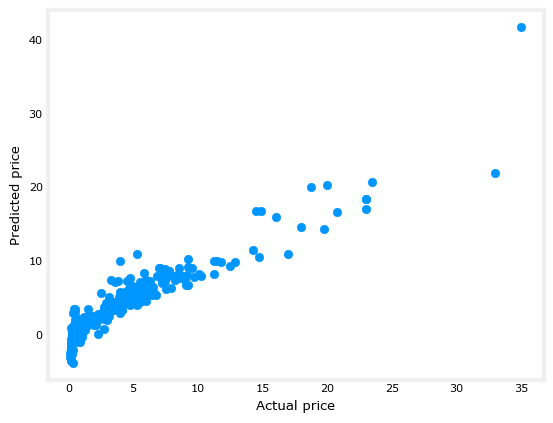

In [17]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")


In [18]:
# prediction on testing data

test_data_prediction = lin_reg_model.predict(X_test)

In [19]:
# r squared error

error_score_test = metrics.r2_score(Y_test, test_data_prediction)

In [20]:
print(f"R squared error: {error_score_test}")

R squared error: 0.8365766715026374


## Visualizing the test data 

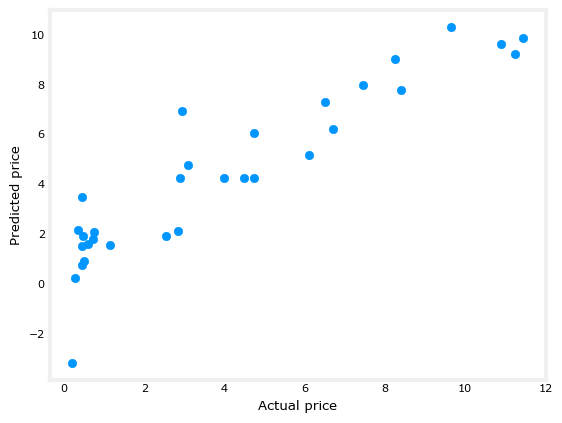

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()